# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [101]:
m=5
run = 1

1

Choose your grid

In [102]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

global source=false

false

In [103]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [104]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [105]:
print(N)

800.0

In [106]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [107]:
using Printf
include("./TMYangMillsTHREE.jl");

In [108]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.00125
the time step is 0.000625


# Initial data of m β Ψ and Ψ,x

In [109]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.01#0.08865958683658391#0.0884375
r0=0.3
sigma=0.08

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [110]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [111]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

801×3 Matrix{Float64}:
 0.0          0.0           0.0
 2.90781e-18  1.49041e-15   1.0991e-11
 7.54895e-18  2.51734e-15   2.47387e-11
 1.39214e-17  3.44292e-15   4.17534e-11
 2.26697e-17  4.43168e-15   6.26276e-11
 3.46698e-17  5.56727e-15   8.80486e-11
 5.11082e-17  6.92273e-15   1.18812e-10
 7.35883e-17  8.57796e-15   1.55838e-10
 1.0427e-16   1.06286e-14   2.00188e-10
 1.46057e-16  1.31934e-14   2.53088e-10
 2.02839e-16  1.64216e-14   3.15947e-10
 2.79816e-16  2.05027e-14   3.90389e-10
 3.83922e-16  2.56772e-14   4.78277e-10
 ⋮                         
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.00210727   0.006334     -3.3286e-17
 0.002107

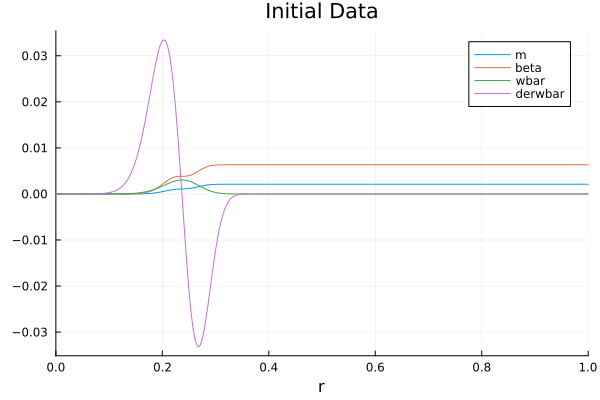

In [112]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [113]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [114]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [115]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [116]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.4010018781298908


In [117]:
using Base.Threads
Threads.nthreads()

4

In [118]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.009852387914760003

In [119]:
dt=0.002/2^(m-1)

0.00025

 ## Time evolution

fixed grid

In [120]:
finaltime=1.25
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 10 dt is 0.00025, t=0.0025000000000000005 speed is 0.49875078125000005, dx/dt=5.0


iteration 20 dt is 0.00025, t=0.005000000000000003 speed is 0.49875078125, dx/dt=5.0


iteration 30 dt is 0.00025, t=0.007500000000000005 speed is 0.49875078125, dx/dt=5.0


iteration 40 dt is 0.00025, t=0.010000000000000007 speed is 0.49875078125, dx/dt=5.0


iteration 50 dt is 0.00025, t=0.01250000000000001 speed is 0.49875078125, dx/dt=5.0


iteration 60 dt is 0.00025, t=0.015000000000000012 speed is 0.49875078125, dx/dt=5.0


iteration 70 dt is 0.00025, t=0.017500000000000012 speed is 0.49875078125, dx/dt=5.0


iteration 80 dt is 0.00025, t=0.020000000000000014 speed is 0.49875078125000005, dx/dt=5.0


iteration 90 dt is 0.00025, t=0.022500000000000017 speed is 0.49875078125000005, dx/dt=5.0


iteration 100 dt is 0.00025, t=0.02500000000000002 speed is 0.49875078125, dx/dt=5.0


iteration 110 dt is 0.00025, t=0.02750000000000002 speed is 0.49875078125000005, dx/dt=5.0


iteration 120 dt 



iteration 910 dt is 0.00025, t=0.22750000000000017 speed is 0.49875078111686405, dx/dt=5.0


iteration 920 dt is 0.00025, t=0.23000000000000018 speed is 0.49875078109773524, dx/dt=5.0


iteration 930 dt is 0.00025, t=0.23250000000000018 speed is 0.4987507810760805, dx/dt=5.0


iteration 940 dt is 0.00025, t=0.23500000000000018 speed is 0.498750781051601, dx/dt=5.0


iteration 950 dt is 0.00025, t=0.23750000000000018 speed is 0.4987507810239657, dx/dt=5.0


iteration 960 dt is 0.00025, t=0.24000000000000019 speed is 0.4987507809928116, dx/dt=5.0


iteration 970 dt is 0.00025, t=0.2425000000000002 speed is 0.4987507809577395, dx/dt=5.0


iteration 980 dt is 0.00025, t=0.2450000000000002 speed is 0.49875078091831193, dx/dt=5.0


iteration 990 dt is 0.00025, t=0.2475000000000002 speed is 0.49875078087405017, dx/dt=5.0


iteration 1000 dt is 0.00025, t=0.25000000000000017 speed is 0.49875078082443164, dx/dt=5.0


iteration 1010 dt is 0.00025, t=0.2524999999999999 speed is 0.49875078076888



iteration 1800 dt is 0.00025, t=0.44999999999997814 speed is 0.49875070595076476, dx/dt=5.0


iteration 1810 dt is 0.00025, t=0.45249999999997786 speed is 0.4987507070089564, dx/dt=5.0


iteration 1820 dt is 0.00025, t=0.4549999999999776 speed is 0.4987507082942269, dx/dt=5.0


iteration 1830 dt is 0.00025, t=0.4574999999999773 speed is 0.4987507098048852, dx/dt=5.0


iteration 1840 dt is 0.00025, t=0.45999999999997704 speed is 0.4987507115374401, dx/dt=5.0


iteration 1850 dt is 0.00025, t=0.46249999999997676 speed is 0.49875071348653205, dx/dt=5.0


iteration 1860 dt is 0.00025, t=0.4649999999999765 speed is 0.49875071564487916, dx/dt=5.0


iteration 1870 dt is 0.00025, t=0.4674999999999762 speed is 0.49875071800323756, dx/dt=5.0


iteration 1880 dt is 0.00025, t=0.46999999999997594 speed is 0.4987507205503797, dx/dt=5.0


iteration 1890 dt is 0.00025, t=0.47249999999997566 speed is 0.4987507232730903, dx/dt=5.0


iteration 1900 dt is 0.00025, t=0.4749999999999754 speed is 0.498750



iteration 2690 dt is 0.00025, t=0.6724999999999537 speed is 0.49875065934729, dx/dt=5.0


iteration 2700 dt is 0.00025, t=0.6749999999999534 speed is 0.49875066593448747, dx/dt=5.0


iteration 2710 dt is 0.00025, t=0.6774999999999531 speed is 0.4987506726030471, dx/dt=5.0


iteration 2720 dt is 0.00025, t=0.6799999999999529 speed is 0.49875067931220063, dx/dt=5.0


iteration 2730 dt is 0.00025, t=0.6824999999999526 speed is 0.4987506860220723, dx/dt=5.0


iteration 2740 dt is 0.00025, t=0.6849999999999523 speed is 0.49875069269399785, dx/dt=5.0


iteration 2750 dt is 0.00025, t=0.687499999999952 speed is 0.4987506992908231, dx/dt=5.0


iteration 2760 dt is 0.00025, t=0.6899999999999518 speed is 0.4987507057771794, dx/dt=5.0


iteration 2770 dt is 0.00025, t=0.6924999999999515 speed is 0.4987507121197329, dx/dt=5.0


iteration 2780 dt is 0.00025, t=0.6949999999999512 speed is 0.49875071828740764, dx/dt=5.0


iteration 2790 dt is 0.00025, t=0.6974999999999509 speed is 0.498750724251578



iteration 3580 dt is 0.00025, t=0.8949999999999292 speed is 0.49875077351605934, dx/dt=5.0


iteration 3590 dt is 0.00025, t=0.8974999999999289 speed is 0.49875077400878465, dx/dt=5.0


iteration 3600 dt is 0.00025, t=0.8999999999999286 speed is 0.49875077448140603, dx/dt=5.0


iteration 3610 dt is 0.00025, t=0.9024999999999284 speed is 0.4987507749335943, dx/dt=5.0


iteration 3620 dt is 0.00025, t=0.9049999999999281 speed is 0.49875077536516993, dx/dt=5.0


iteration 3630 dt is 0.00025, t=0.9074999999999278 speed is 0.49875077577609056, dx/dt=5.0


iteration 3640 dt is 0.00025, t=0.9099999999999275 speed is 0.4987507761664379, dx/dt=5.0


iteration 3650 dt is 0.00025, t=0.9124999999999273 speed is 0.49875077653640537, dx/dt=5.0


iteration 3660 dt is 0.00025, t=0.914999999999927 speed is 0.49875077688628555, dx/dt=5.0


iteration 3670 dt is 0.00025, t=0.9174999999999267 speed is 0.4987507772164585, dx/dt=5.0


iteration 3680 dt is 0.00025, t=0.9199999999999264 speed is 0.4987507775



iteration 4470 dt is 0.00025, t=1.1174999999999569 speed is 0.49875078124995287, dx/dt=5.0


iteration 4480 dt is 0.00025, t=1.1199999999999577 speed is 0.4987507812499638, dx/dt=5.0


iteration 4490 dt is 0.00025, t=1.1224999999999585 speed is 0.4987507812499725, dx/dt=5.0


iteration 4500 dt is 0.00025, t=1.1249999999999594 speed is 0.49875078124997924, dx/dt=5.0


iteration 4510 dt is 0.00025, t=1.1274999999999602 speed is 0.4987507812499848, dx/dt=5.0


iteration 4520 dt is 0.00025, t=1.129999999999961 speed is 0.49875078124998906, dx/dt=5.0


iteration 4530 dt is 0.00025, t=1.1324999999999619 speed is 0.4987507812499923, dx/dt=5.0


iteration 4540 dt is 0.00025, t=1.1349999999999627 speed is 0.4987507812499947, dx/dt=5.0


iteration 4550 dt is 0.00025, t=1.1374999999999635 speed is 0.4987507812499966, dx/dt=5.0


iteration 4560 dt is 0.00025, t=1.1399999999999644 speed is 0.4987507812499979, dx/dt=5.0


iteration 4570 dt is 0.00025, t=1.1424999999999652 speed is 0.49875078124999